In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [72]:
url = "https://raw.githubusercontent.com/monishm-2004/sleep-disorder-predicition/refs/heads/main/Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(url)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [73]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [74]:
df['Sleep Disorder']=df['Sleep Disorder'].fillna('healthy')
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,healthy
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,healthy
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,healthy
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,healthy
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,healthy
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,healthy


In [75]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


This tells us that we have 374 different entries with the mean age being 42 and minimum and maximum being 27 and 59 respectively.


In [76]:
df.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,healthy
freq,189,73,195,99,219


##EDA

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
Sleep Apnea     Female     67
                Male       11
healthy         Male      137
                Female     82
Name: count, dtype: int64


<Axes: xlabel='Sleep Disorder', ylabel='count'>

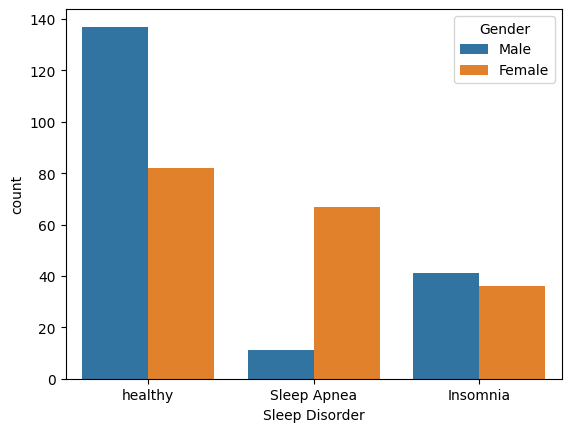

In [77]:
print(df.groupby('Sleep Disorder')['Gender'].value_counts())
sns.countplot(x='Sleep Disorder', hue='Gender', data=df)

We can infer that there are more healthy males than females.
Also Sleep Apnea is much higher in females than males.

Sleep Disorder  Occupation          
Insomnia        Salesperson             29
                Teacher                 27
                Accountant               7
                Engineer                 5
                Doctor                   3
                Nurse                    3
                Lawyer                   2
                Software Engineer        1
Sleep Apnea     Nurse                   61
                Doctor                   4
                Teacher                  4
                Lawyer                   3
                Sales Representative     2
                Scientist                2
                Engineer                 1
                Salesperson              1
healthy         Doctor                  64
                Engineer                57
                Lawyer                  42
                Accountant              30
                Nurse                    9
                Teacher                  9
                S

<Axes: xlabel='Sleep Disorder', ylabel='count'>

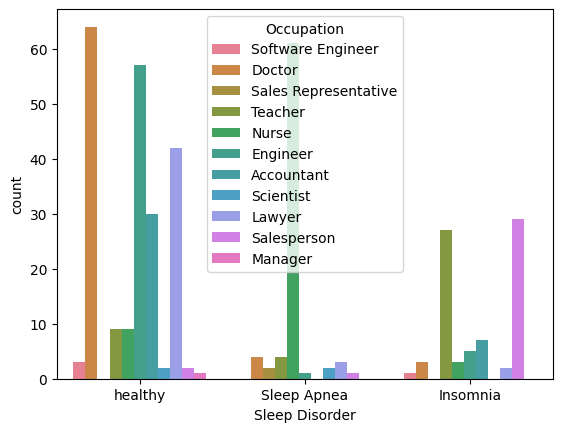

In [78]:
print(df.groupby('Sleep Disorder')['Occupation'].value_counts())
sns.countplot(x='Sleep Disorder', hue='Occupation', data=df)

We can roughly estimate that most Nurses suffer from Sleep Apnea while most Teachers and Salespersons suffer from Insomnia.

Sleep Disorder  BMI Category 
Insomnia        Overweight        64
                Normal             7
                Obese              4
                Normal Weight      2
Sleep Apnea     Overweight        65
                Obese              6
                Normal             5
                Normal Weight      2
healthy         Normal           183
                Overweight        19
                Normal Weight     17
Name: count, dtype: int64


<Axes: xlabel='Sleep Disorder', ylabel='count'>

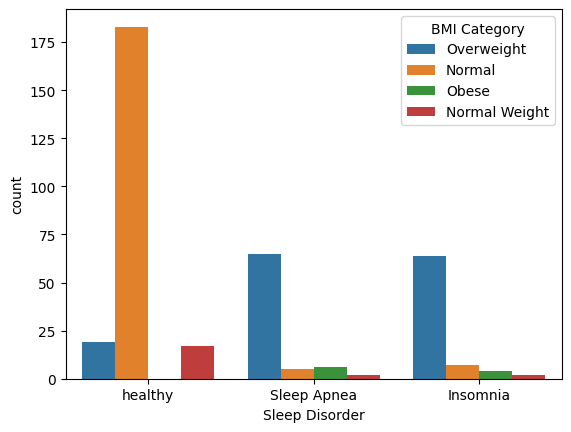

In [79]:
print(df.groupby('Sleep Disorder')['BMI Category'].value_counts())
sns.countplot(x='Sleep Disorder', hue='BMI Category', data=df)

We can also infer that most over overweight individuals suffer with sleep apnea or insomnia while individuals with a normal weight are usually healhty


##PREPROCCESSING

In [80]:
# Splitting blood pressure into high and low BP
df['BP_High'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0]).astype(int)
df['BP_Low'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1]).astype(int)
df=df.drop('Blood Pressure',axis=1)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP_High,BP_Low
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,healthy,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,healthy,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,healthy,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [81]:
cat_colm = df.select_dtypes(include=['object']).columns
num_colm = df.select_dtypes(include=['int64', 'float64']).columns
print(cat_colm)
print(num_colm)

Index(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype='object')
Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'BP_High', 'BP_Low'],
      dtype='object')


In [82]:
print(df['BMI Category'].unique())

['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [83]:
df['BMI Category']=df['BMI Category'].replace('Normal Weight', 'Normal')
print(df['BMI Category'].unique())

['Overweight' 'Normal' 'Obese']


#Label Encoding for BMI Cateogory and One-hot for gender and occupation



In [84]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label encode BMI Category
le = LabelEncoder()
df['BMI Category'] = le.fit_transform(df['BMI Category'])
print(dict(zip(le.classes_, le.transform(le.classes_))))
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

# One-hot encode Gender and Occupation
df = pd.get_dummies(df, columns=['Gender', 'Occupation'], dtype=int)

# Check final columns
print(df.head())

{'Normal': np.int64(0), 'Obese': np.int64(1), 'Overweight': np.int64(2)}
{'Insomnia': np.int64(0), 'Sleep Apnea': np.int64(1), 'healthy': np.int64(2)}
   Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0          1   27             6.1                 6                       42   
1          2   28             6.2                 6                       60   
2          3   28             6.2                 6                       60   
3          4   28             5.9                 4                       30   
4          5   28             5.9                 4                       30   

   Stress Level  BMI Category  Heart Rate  Daily Steps  Sleep Disorder  ...  \
0             6             2          77         4200               2  ...   
1             8             0          75        10000               2  ...   
2             8             0          75        10000               2  ...   
3             8             1          85         30

#Train-Test split

In [85]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [88]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
rf.fit(X_train_scaled, y_train)

print("---- Random Forest ----")
evaluate_model(rf, X_test_scaled, y_test)


---- Random Forest ----
Accuracy: 0.21333333333333335

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.21      1.00      0.35        16
           2       0.00      0.00      0.00        43

    accuracy                           0.21        75
   macro avg       0.07      0.33      0.12        75
weighted avg       0.05      0.21      0.08        75


Confusion Matrix:
 [[ 0 16  0]
 [ 0 16  0]
 [ 0 43  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

In [89]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb.fit(X_train_scaled, y_train)

print("---- XGBoost ----")
evaluate_model(xgb, X_test_scaled, y_test)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:46:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


---- XGBoost ----
Accuracy: 0.21333333333333335

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.21      1.00      0.35        16
           2       0.00      0.00      0.00        43

    accuracy                           0.21        75
   macro avg       0.07      0.33      0.12        75
weighted avg       0.05      0.21      0.08        75


Confusion Matrix:
 [[ 0 16  0]
 [ 0 16  0]
 [ 0 43  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [90]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)
logr.fit(X_train_scaled, y_train)

print("---- Logistic Regression ----")
evaluate_model(logr, X_test_scaled, y_test)


---- Logistic Regression ----
Accuracy: 0.21333333333333335

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.21      1.00      0.35        16
           2       0.00      0.00      0.00        43

    accuracy                           0.21        75
   macro avg       0.07      0.33      0.12        75
weighted avg       0.05      0.21      0.08        75


Confusion Matrix:
 [[ 0 16  0]
 [ 0 16  0]
 [ 0 43  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

In [91]:
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    random_state=42
)
svm.fit(X_train_scaled, y_train)

print("---- SVM ----")
evaluate_model(svm, X_test_scaled, y_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---- SVM ----
Accuracy: 0.5733333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        16
           2       0.57      1.00      0.73        43

    accuracy                           0.57        75
   macro avg       0.19      0.33      0.24        75
weighted avg       0.33      0.57      0.42        75


Confusion Matrix:
 [[ 0  0 16]
 [ 0  0 16]
 [ 0  0 43]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [92]:
models = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'Logistic Regression': logr,
    'SVM': svm
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    results[name] = accuracy_score(y_test, y_pred)

print("\nModel Accuracy Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.3f}")



Model Accuracy Comparison:
Random Forest: 0.880
XGBoost: 0.893
Logistic Regression: 0.893
SVM: 0.867


In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

models = {
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42)),
    "SVM": make_pipeline(StandardScaler(), SVC(random_state=42))
}

# Perform 5-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f} | Std = {scores.std():.4f}")

XGBoost: Mean Accuracy = 0.5969 | Std = 0.1544
Random Forest: Mean Accuracy = 0.6500 | Std = 0.1278
Logistic Regression: Mean Accuracy = 0.8395 | Std = 0.0921
SVM: Mean Accuracy = 0.8207 | Std = 0.1086
